In [2]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import random
import h5py

from sklearn.feature_extraction import image
from keras.utils import np_utils

%matplotlib inline

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def make_binary_image(im):
    im_bin=im.copy()
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i,j]>127: 
                im_bin[i,j]=1
            else:
                im_bin[i,j]=0
    
    return im_bin
                
def add_noise(img, delta):
    
    flatten_img = img.reshape((img.shape[0]*img.shape[1],)).copy()
    img_len = flatten_img.shape[0]
    
    for idx in range(img_len):
        rand_value = random.random()
        if flatten_img[idx] == 0:
            if rand_value < delta:
                flatten_img[idx] = 1
        else:
            if rand_value < delta:
                flatten_img[idx] = 0
                
    noisy_img = flatten_img.reshape(img.shape[0],img.shape[1])
                
    return noisy_img
            

path_dir_BSD = './source_data/test_data/BSD68/'
file_list_BSD = os.listdir(path_dir_BSD)
file_list_BSD.sort()

In [3]:
dataset_len = 20
binary_bsd_dataset = np.zeros(((dataset_len,321,481)))

In [4]:
for idx in range(dataset_len):
    
    img = mpimg.imread(path_dir_BSD + file_list_BSD[idx])
    gray_img = img.copy()*255
#     gray_img = rgb2gray(img)

    if gray_img.shape[0] == 481:
        gray_img = np.rot90(gray_img)
        
    binary_img = make_binary_image(gray_img)
    
    binary_bsd_dataset[idx,:,:] = binary_img
    

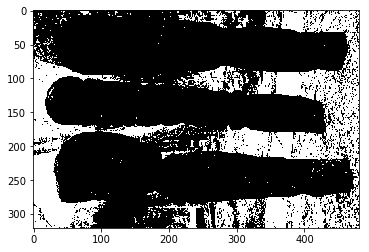

In [5]:
## plot true img
plt.imshow(binary_bsd_dataset[0], cmap = plt.get_cmap('gray'))

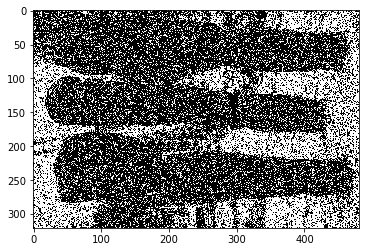

In [6]:
## plot noisy img
plt.imshow(add_noise(binary_bsd_dataset[0], 0.2), cmap = plt.get_cmap('gray'))

In [23]:
delta_arr = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

true_img = binary_bsd_dataset.copy()
noise_img_arr = np.zeros((len(delta_arr),dataset_len,321,481))

for delta_idx in range (len(delta_arr)):
    for img_idx in range(dataset_len):
        noise_img = add_noise(binary_bsd_dataset[img_idx], delta_arr[delta_idx])
        noise_img_arr[delta_idx, img_idx,:,:] = noise_img

print (true_img.shape)
print (noise_img_arr.shape)

f = h5py.File("NDUDE_test_data_BSD20.hdf5", "w")
f.create_dataset('true_img', data=true_img)
f.create_dataset('delta5', data=noise_img_arr[0])
f.create_dataset('delta10', data=noise_img_arr[1])
f.create_dataset('delta15', data=noise_img_arr[2])
f.create_dataset('delta20', data=noise_img_arr[3])
f.create_dataset('delta25', data=noise_img_arr[4])
f.create_dataset('delta30', data=noise_img_arr[5])
f.close()
        
        
        

(20, 321, 481)
(6, 20, 321, 481)


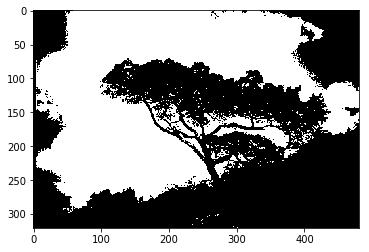

In [24]:
plt.imshow(true_img[-1], cmap = plt.get_cmap('gray'))

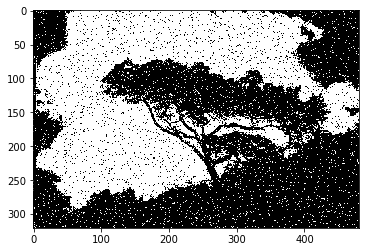

In [25]:
plt.imshow(noise_img_arr[0,-1], cmap = plt.get_cmap('gray'))

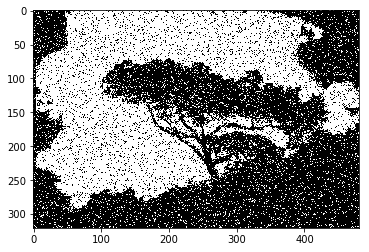

In [26]:
plt.imshow(noise_img_arr[1,-1], cmap = plt.get_cmap('gray'))

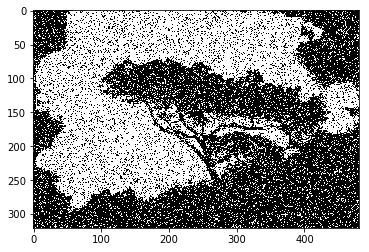

In [27]:
plt.imshow(noise_img_arr[2,-1], cmap = plt.get_cmap('gray'))

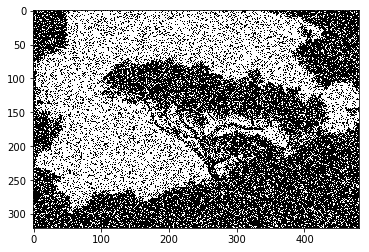

In [28]:
plt.imshow(noise_img_arr[3,-1], cmap = plt.get_cmap('gray'))

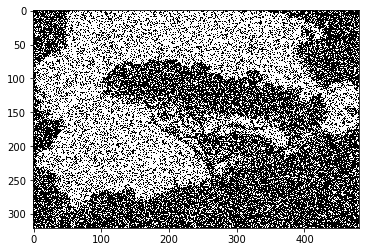

In [29]:
plt.imshow(noise_img_arr[4,-1], cmap = plt.get_cmap('gray'))

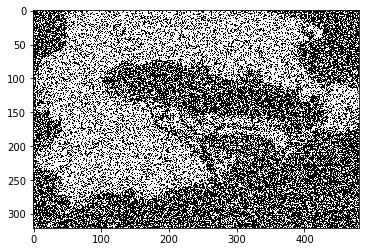

In [30]:
plt.imshow(noise_img_arr[5,-1], cmap = plt.get_cmap('gray'))